In [1]:
import os
import sys
from joblib import load
import torch

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')
sys.path.insert(0, '../../../..')
sys.path.insert(0, '../../../../..')

from reimplemented_approaches.proactive_conformance_checking.data_prep_split_encode import PrefixDataset
from reimplemented_approaches.proactive_conformance_checking.models import LSTMCollectiveIDP
from reimplemented_approaches.proactive_conformance_checking.evaluation import PredictionResults, Metrics

In [2]:
data_dir = "../data_preparation/Helpdesk/"
path_model = "../training/Helpdesk/LSTM_collecctive_IDP.pkl"

In [3]:
_, test_set = PrefixDataset.load_datasets(save_path=data_dir)

encoders = load(data_dir+"/encoders.pkl")
deviations = encoders.get("deviations")

In [4]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')
print(f"Evaluating on {device}")

Evaluating on cpu


In [5]:
model = LSTMCollectiveIDP.load(path_model, device=device)

In [6]:
pr = PredictionResults(model=model, test_set=test_set)
probs, preds, targets = pr.get_predictions_targets()



{'precision_per_label': array([0., 0., 0., 0., 0., 0.]), 'recall_per_label': array([0., 0., 0., 0., 0., 0.]), 'macro_precision': 0.0, 'macro_recall': 0.0}
{'precision_per_label_non_deviation': array([0.99845419, 0.99732996, 0.99044407, 0.96444632, 0.96205734,
       0.93957279]), 'recall_per_label_non_deviation': array([1., 1., 1., 1., 1., 1.]), 'macro_precision_non_deviation': 0.9753841109237399, 'macro_recall_non_deviation': 1.0}


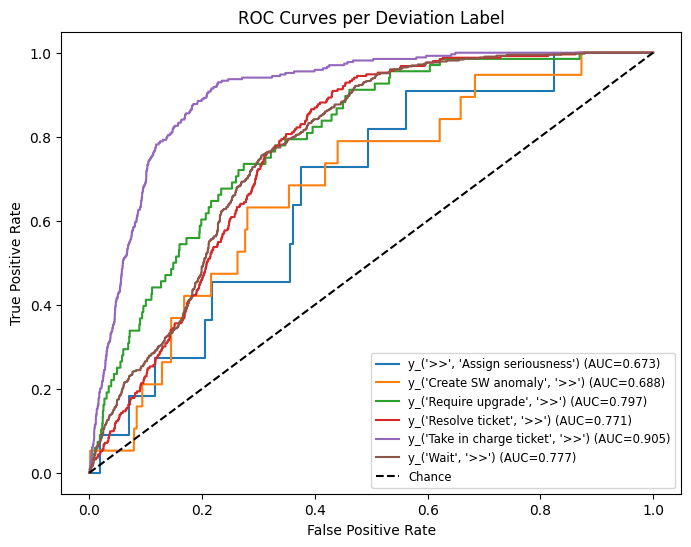

{'per_label_auc': array([0.67267609, 0.68800383, 0.7970294 , 0.77063523, 0.9046959 ,
       0.77650001]), 'macro_auc': 0.7682567437817317}


In [7]:
m = Metrics(preds=preds, targets=targets)

res_dev = m.macro_precision_recall_dev()
print(res_dev)

res_no_dev = m.macro_precision_recall_no_dev()
print(res_no_dev)

roc_auc = m.plot_macro_roc_auc(prob_scores=probs, label_names=deviations)
print(roc_auc)